# **1. Introduction**

Link to the dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download

We acquired our dataset, diabetes_prediction_dataset.csv, from Kaggle. Our dataset initially contained 100,000 rows, but after cleaning and processing the data for the regression, the dataset was filtered down to 64,172 rows. The dataset is composed of individual cases with patient’s gender, age, presence of hypertension (yes or no), presence of heart disease (yes or no), patient’s smoking history (former, current, never, etc.), patient’s body mass index (bmi), Hb1Ac level (the average blood glucose levels for the last 2 or 3 months), current blood glucose level, and the actual presence of diabetes (yes or no).

For this project, we identified three research questions that we were curious to answer:
1. Can any of the features above (excluding the diabetes column, of course) predict the presence of diabetes?
2. Does being a specific gender increase the chance of being diabetic?
3. Which of the features above contributes most to predicting the presence of diabetes?

In conducting our regression, we aimed to examine the relationship between the aforementioned features (gender, age, hypertension, etc.) and the presence of diabetes, which became our target outcome. We further split the data based on demographic categories, such as gender and age brackets, and conducted the regression again with them as features to analyze their impact on the presence of diabetes. Finally, we conducted an analysis on the accuracy of our regression models, determining how well the model predicted whether an individual would have diabetes or not using the features given.


# **2. Data Wrangling**

## Importing packages

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

The diabetes_prediction_dataset.csv that we utilized required preprocessing before it could be used to conduct a logistic regression. We read the csv data into the google colab using the “upload” method from the “files” module in the “google.colab” package. This way, users can download the dataset from Kaggle and then upload it using response from the code.

In [ ]:
# Reading the data
from google.colab import files
uploaded = files.upload()
new_diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")
new_diabetes_df.head()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Cleaning

While examining the dataset, we realized that it contained no null values. However, in the “smoking_history” column, there were a lot of values stating “No Info.” Since “No Info” means that no information was collected for such cases, we chose to treat it as a null value. We believed “No Info” would end up negatively impacting the integrity of the regression. Therefore, we removed all rows where the “smoking_history” had “No Info” as a value. We further chose to drop the rows with “Other” value in the gender column for similar reasons, since it would be introducing ambiguity and impacting the regression conducted for the demographic split based on the gender variable. Therefore, all rows containing “Other” as a value in the “gender” column were dropped.

After these rows were dropped, we saw that both “smoking_history” and “gender” columns had string values and, therefore, needed to be encoded to be used as features for the logistic regression. We used the “get_dummies” method in pandas to create separate columns in the DataFrame for each categorical string value. The “gender” column was split into “gender_Female” and “gender_Male” columns with binary values (0 or 1) to indicate no or yes. Similarly, the “smoking_history” column was split into “smoking_history_current,” “smoking_history_ever,” “smoking_history_former,” “smoking_history_never,” and “smoking_history_not current” columns with binary values (0 or 1) to indicate no or yes.


In [ ]:
# Removing all rows that had 'gender' as 'Other' and/or 'smoking history' as 'No Info'
clean_diabetes_df = new_diabetes_df[(new_diabetes_df['gender'] != 'Other') & (new_diabetes_df['smoking_history'] != 'No Info')]

# Encoding columns with string values to prepare for logistic regression
diabetes_df = pd.get_dummies(clean_diabetes_df, columns=['gender', 'smoking_history'])
diabetes_df.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,True,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,True,False,False,False,False
5,20.0,0,0,27.32,6.6,85,0,True,False,False,False,False,True,False


## Features & Target

Now the data has been processed and ready for regression. The regression would be used to predict the diabetes column, which has binary values 0 or 1 for no or yes. We determined the rest of the columns, “age,” “hypertension,” “heart_disease,” “bmi,” “Hb1Ac_level,” “blood_glucose_level,” “gender_Female,” “gender_Male,” “smoking_history_current,” “smoking_history_ever,” “smoking_history_former,” “smoking_history_never,” and “smoking_history_not current,” were all relevant in predicting whether a person has diabetes or not. All these columns represent the questions that medical professionals ask or tests they conduct in such cases. Therefore, for features (X) all columns were used, except “diabetes” which is the outcome variable (y).

In [ ]:
# Setting features and target
X = diabetes_df.drop(columns=['diabetes'])
y = diabetes_df.diabetes

# **3. Splitting & Preprocessing Data**

In [ ]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Preprocessing data using StandardScaler
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **4. Logistic Regression**

In [ ]:
# Running the regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Classes, Intercept, and Coefficients
print('Classes', log_reg.classes_)
print('Intercept', log_reg.intercept_)
print('Coefficients', log_reg.coef_)

# Accuracy of the prediction
print('Accuracy', log_reg.score(X_test, y_test))

Classes [0 1]
Intercept [-4.5701517]
Coefficients [[ 0.91575622  0.21657366  0.13788233  0.56611528  2.50378097  1.38367541
  -0.07031666  0.07031666  0.04533858  0.02078733 -0.00329397 -0.01923139
  -0.03399718]]
Accuracy 0.9502586797980428


# **5. Classification Report**


For precision, 96% of instances predicted as 0 were actually 0, and 87% of instances predicted as 1 were actually 1. For recall 99% of the actual class 0 instances were correctly predicted as 0. For 1, 64% of the actual class 1 instances were correctly predicted as 1. Recall is the mean of precision and recall. For recall, class 0 had a .97 while class 1 had a .74. Overall, the model shows high precision but low recall for class 1. This suggests the model may be better at correctly identifying negative instances than positive instances.

In [ ]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14308
           1       0.87      0.64      0.74      1735

    accuracy                           0.95     16043
   macro avg       0.91      0.81      0.85     16043
weighted avg       0.95      0.95      0.95     16043



# **6. Confusion Matrix**

Text(0.5, 427.9555555555555, 'Predicted Label')

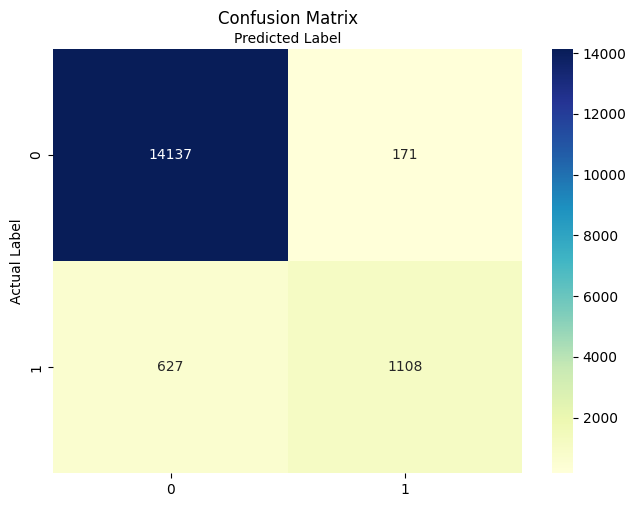

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

When analyzing the confusion matrix of our regression, we found that out of 14,308 cases that did not actually have diabetes (0), 14,137 were correctly predicted by the model to not have diabetes. However, the model incorrectly identified 171 cases as having diabetes. Furthermore, out of the 1,735 cases that did actually have diabetes (1), 1,108 were correctly predicted by the model to have diabetes, while 627 were incorrectly indentified as not having diabetes.

$True Negative Rate = \frac{TN}{FP+TN} = \frac{14137}{171+14137}=0.988$

$False Positive Rate = \frac{FP}{FP+TN} = \frac{171}{171+14137}=0.012$

$True Positive Rate = \frac{TP}{TP+FN} = \frac{1108}{1108+627}=0.639$

$False Negative Rate = \frac{FN}{TP+FN} = \frac{627}{1108+627}=0.361$


This shows that the model is more effective at predicting cases that do not have diabetes (True Negative Rate) than cases that do have diabetes (True Positive Rate), as the model better captured the actual negative cases than positive.

# **7. Demographic Variables**

In [ ]:
## Step (4) with only males. Splitting the dataset from males vs females and trainging the new dataframe.
df_male = diabetes_df[diabetes_df['gender_Male']==True]
X = df_male.drop("diabetes",axis=1)
y = df_male.diabetes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_prediction=LogReg.predict(X_test)
df_male.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,True,False
4,76.0,1,1,20.14,4.8,155,0,False,True,True,False,False,False,False
8,42.0,0,0,33.64,4.8,145,0,False,True,False,False,False,True,False
16,15.0,0,0,30.36,6.1,200,0,False,True,False,False,False,True,False
19,37.0,0,0,25.72,3.5,159,0,False,True,False,True,False,False,False


In [ ]:
## Step (5) with only males. Classification results from only males.
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-4.13398965]
Coefficients [[ 8.93222626e-01  2.46944068e-01  1.71789162e-01  4.62442811e-01
   2.50643291e+00  1.44971415e+00  0.00000000e+00  0.00000000e+00
   2.78815666e-02 -2.50376169e-03  1.56138053e-02  1.00533634e-02
  -6.92746957e-02]]


In [ ]:
## Step(5) cont. for only males.
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.942654028436019
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5522
           1       0.85      0.67      0.75       808

    accuracy                           0.94      6330
   macro avg       0.90      0.83      0.86      6330
weighted avg       0.94      0.94      0.94      6330



Explanation of Classification Report:

The report of the model for males only shows that the precision is 0.95, the recall is 0.98, and the F1-score is 0.97. This decimals mean several things about the overall effectiveness of the model. The precision being 0.95 means that all the males that were predicted to have diabetes divided by all the males who actually have diabetes is 0.95. Conversely, the recall says that all the males who actually have diabetes divided by all the males who were predicted to have diabetes is 0.98. Finally, the F1-score of the model being 0.97 shows that the model itsel is 97% accurate.

Text(0.5, 427.9555555555555, 'Predicted Label')

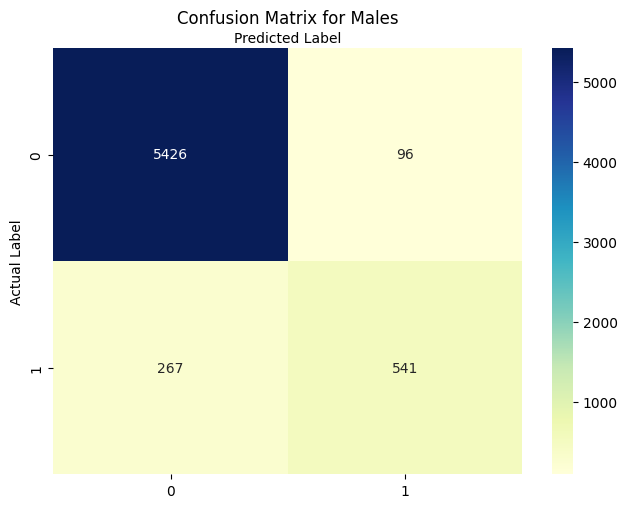

In [ ]:
## Step (6) confusion matrix for only males.
conf_mat = confusion_matrix(y_test, y_prediction)
conf_mat

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Males')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



$False Positive Rate = \frac{FP}{FP+TN} = \frac{96}{96+5426}=0.017$

---
$True Positive Rate = \frac{TP}{TP+FN} = \frac{541}{541+267}=0.67$

---





# Confusion Matrix for Males Only

---



The Confusion Matrix of our model for males only shows several things. First, it tells us that for the 5,552 males who did not have diabetes, the model predicted that 5,426 of them would not have diabetes and 96 of them would have diabetes. Next, it tells us that for the 808 males who did have diabetes, the model predicted that 267 of them do have diabetes and 541 of them do not. From these sections, we can calculate a False Positive Rate of 0.017 and a True Positive Rate of 0.67. Essentially, this shows that our model is generally accurate at predicting for males who do not have diabetes, but poor at predicting for males who do have diabetes.

In [ ]:
## Step (4) for only females.
df_female = diabetes_df[diabetes_df['gender_Female']==True]
X = df_female.drop("diabetes",axis=1)
y = df_female.diabetes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_prediction=LogReg.predict(X_test)

In [ ]:
## Step (5) for only females.
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-4.90256703]
Coefficients [[ 0.94411602  0.22336461  0.1331324   0.65385375  2.51782066  1.36351867
   0.          0.          0.05042323  0.03520529 -0.02745119 -0.02783028
  -0.00847928]]


In [ ]:
## Step (5) cont. for only females.
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9552146607639246
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8807
           1       0.87      0.61      0.72       906

    accuracy                           0.96      9713
   macro avg       0.91      0.80      0.85      9713
weighted avg       0.95      0.96      0.95      9713



Explanation of Classification Report:

The report of the model for females only shows that the precision is 0.96, the recall is 0.99, and the F1-score is 0.98. The precision being 0.96 means that all the females that were predicted to have diabetes divided by all the males who actually have diabetes is 0.96. In other words, the proportion of predicted females to have diabetes over the actual amount of females to have diabetes is 0.96. Conversely, the recall says that all the males who actually have diabetes divided by all the males who were predicted to have diabetes is 0.99. Again,this tells us that the proportion of actual females to have diabetes over the predicted amount of females to have diabetes is 0.99. Finally, the F1-score of the model being 0.98 shows that the model itsel is 98% accurate.

Text(0.5, 427.9555555555555, 'Predicted Label')

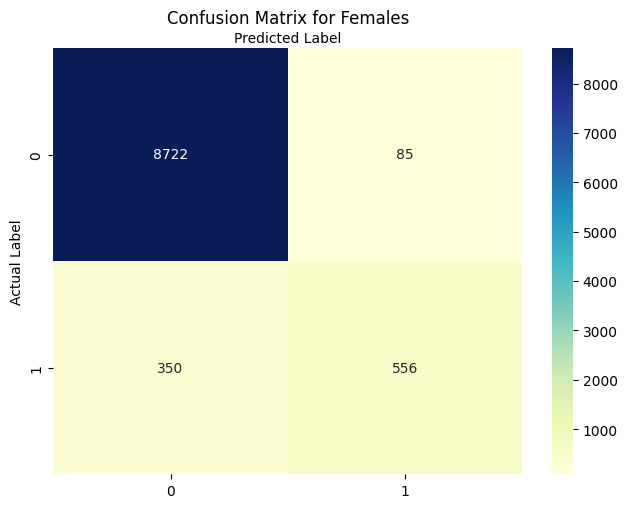

In [ ]:
## Step (6) for only females.
conf_mat = confusion_matrix(y_test, y_prediction)
conf_mat

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Females')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


$False Positive Rate = \frac{FP}{FP+TN} = \frac{85}{85+8722}=0.01$


---


$True Positive Rate = \frac{TP}{TP+FN} = \frac{541}{541+267}=0.67$

---

# Confusion Matrix for Females Only

The Confusion Matrix of our model for females only shows several things. First, it tells us that for the 8,807 females who did not have diabetes, the model predicted that 8,722 of them would not have diabetes and 85 of them would have diabetes. Next, it tells us that for the 906 females who did have diabetes, the model predicted that 350 of them do not have diabetes and 556 of them do. From these sections, we can calculate a False Positive Rate of 0.01 and a True Positive Rate of 0.67. Essentially, this shows that our model is generally accurate at predicting for females who do not have diabetes, but poor at predicting for females who do have diabetes.

In [ ]:
## Step (4) for people aged 0 to 25 years old.
df_ages_0_to_25 = diabetes_df[diabetes_df['age']<25]
X = df_ages_0_to_25.drop("diabetes",axis=1)
y = df_ages_0_to_25.diabetes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
## Step (5) for ages 0 to 25.
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-8.26902683]
Coefficients [[ 0.42172221 -0.20539118 -0.03710373 -0.12761522  3.0098809   1.39534481
  -0.05895587  0.05895587 -0.04700762  0.09363934 -0.48283303  0.02053403
   0.24685301]]


In [ ]:
## Step (5) cont. for ages 0 to 25.
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9932243921881228
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2477
           1       1.00      0.47      0.64        32

    accuracy                           0.99      2509
   macro avg       1.00      0.73      0.82      2509
weighted avg       0.99      0.99      0.99      2509



Explanation of Classification Report:

The report of the model for peoples ages 0 to 25 shows that the precision is 0.99, the recall is 1.00, and the F1-score is 1.00. The precision being 0.99 means that people ages 0 to 25 that were predicted to have diabetes divided by all people ages 0 to 25 who actually have diabetes is 0.99. In other words, the proportion of predicted individuals ages 0 to 25 to have diabetes over the actual amount of individuals ages 0 to 25 to have diabetes is 0.99. Conversely, the recall says that all people in the age group who actually have diabetes divided by all the people in the age group who were predicted to have diabetes is 1.00. Again,this tells us that the proportion of actual individuals ages 0 to 25 to have diabetes over the predicted amount of individuals ages 0 to 25 to have diabetes is 1.00. Finally, the F1-score of the model being 1.00 shows that the model itsel is 100% accurate.

Text(0.5, 427.9555555555555, 'Predicted Label')

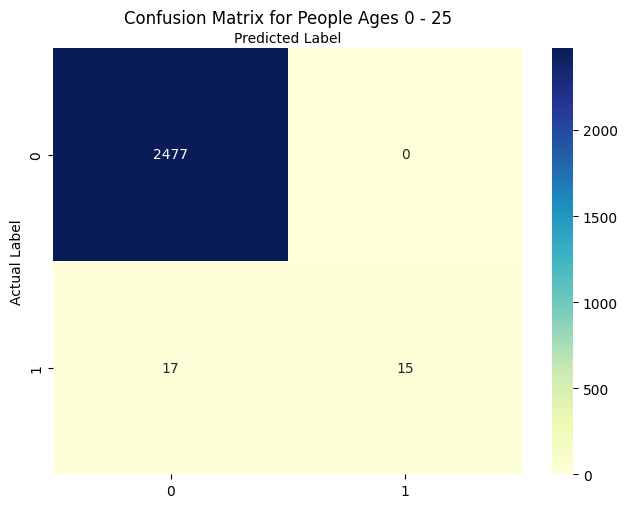

In [ ]:
## Step (6) for ages 0 to 25.
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for People Ages 0 - 25')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

$False Positive Rate = \frac{FP}{FP+TN} = \frac{0}{0+2477}=0.0$

---


$True Positive Rate = \frac{TP}{TP+FN} = \frac{15}{15+17}=0.47$


---




# Confusion Matrix for Individuals Ages 0 to 25 Only

The Confusion Matrix of our model for individuals 0 to 25 only shows several things. First, it tells us that for the 2,477 individuals in the age group who did not have diabetes, the model predicted that 2,477 of them would not have diabetes and 0 of them would have diabetes. Next, it tells us that for the 32 individuals in the age group who did have diabetes, the model predicted that 17 of them do not have diabetes and 15 of them do. From these sections, we can calculate a False Positive Rate of 0.0, and a True Positive Rate of 0.47. Essentially, this shows that our model is perfect at predicting for individuals ages 0 to 25 who do not have diabetes, but not accurate at predicting those in the age group who do have diabetes.

In [ ]:
## Step (4) for ages 25 to 50
df_ages_25_to_50 = diabetes_df[(diabetes_df['age'] >= 25) & (diabetes_df['age'] < 50)]
X = df_ages_25_to_50.drop("diabetes", axis=1)
y = df_ages_25_to_50.diabetes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
## Step (5) for ages 25 to 50.
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-5.62563969]
Coefficients [[ 0.45287716  0.22811599  0.14091486  0.53647978  2.52546128  1.24880723
  -0.06616338  0.06616338  0.02508292  0.0680861  -0.04083221 -0.03764877
   0.01324361]]


In [ ]:
## Step (5) cont. for ages 25 to 50.
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9694008330663249
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5905
           1       0.90      0.49      0.63       337

    accuracy                           0.97      6242
   macro avg       0.94      0.74      0.81      6242
weighted avg       0.97      0.97      0.97      6242



Explanation of Classification Report:

The report of the model for peoples ages 25 to 50 shows that the precision is 0.97, the recall is 1.00, and the F1-score is 0.98 The precision being 0.97 means that people ages 25 to 50 that were predicted to have diabetes divided by all people ages 25 to 50 who actually have diabetes is 1.00. In other words, the proportion of predicted individuals ages 25 to 50 to have diabetes over the actual amount of individuals ages 25 to 50 to have diabetes is 0.97. Conversely, the recall says that all people in the age group who actually have diabetes divided by all the people in the age group who were predicted to have diabetes is 1.00. Again, this tells us that the proportion of actual individuals ages 25 to 50 to have diabetes over the predicted amount of individuals ages 25 to 50 to have diabetes is 1.00. Finally, the F1-score of the model being 0.98 shows that the model itsel is 98% accurate.

Text(0.5, 427.9555555555555, 'Predicted Label')

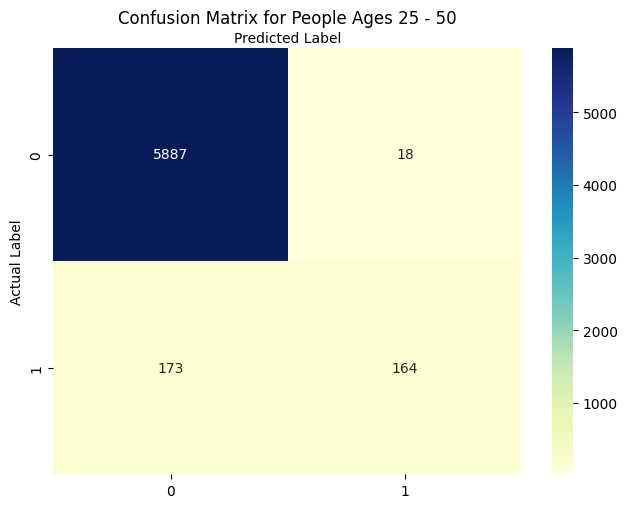

In [ ]:
## Step (6) for ages 25 to 50.
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for People Ages 25 - 50')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

$False Positive Rate = \frac{FP}{FP+TN} = \frac{18}{18+5887}=0.003$

---
$True Positive Rate = \frac{TP}{TP+FN} = \frac{164}{164+173}=0.49$


---




# Confusion Matrix for Individuals Ages 25 to 50 Only

The Confusion Matrix of our model for individuals in the age only shows several things. First, it tells us that for the 5,905 individuals in the age group who did not have diabetes, the model predicted that 5,887 of them would not have diabetes and 18 of them would have diabetes. Next, it tells us that for the 337 individuals in the age group who do have diabetes, the model predicted that 173 of them do not have diabetes and 164 of them do. From these sections, we can calculate a False Positive Rate of 0.003, and a True Positive Rate of 0.49. Essentially, this shows that our model is very good at predicting for individuals in the age group who do not have diabetes, but not accurate at predicting those in the age group who do have diabetes.  

In [ ]:
## Step (4) for ages 50 to 75
df_ages_50_to_75 = diabetes_df[(diabetes_df['age'] >= 50) & (diabetes_df['age'] < 75)]
X = df_ages_50_to_75.drop("diabetes", axis=1)
y = df_ages_50_to_75.diabetes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
## Step (5) for ages 50 to 75.
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-3.21164833]
Coefficients [[ 0.35682344  0.25535286  0.19374521  0.59975079  2.61858589  1.48547592
  -0.07157464  0.07157464  0.04586583  0.03796539 -0.01375427 -0.03050323
  -0.0155131 ]]


In [ ]:
## Step (5) cont. for ages 50 to 75.
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9175564502012953
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4637
           1       0.87      0.66      0.75      1076

    accuracy                           0.92      5713
   macro avg       0.90      0.82      0.85      5713
weighted avg       0.92      0.92      0.91      5713



Explanation of Classification Report:

The report of the model for peoples ages 50 to 75 shows that the precision is 0.93, the recall is 0.98, and the F1-score is 0.95. The precision being 0.93 means that people ages 50 to 75 that were predicted to have diabetes divided by all people ages 50 to 75 who actually have diabetes is 0.93. In other words, the proportion of predicted individuals ages 50 to 75 to have diabetes over the actual amount of individuals ages 50 to 75 to have diabetes is 0.93. Conversely, the recall says that all people in the age group who actually have diabetes divided by all the people in the age group who were predicted to have diabetes is 0.98. Again,this tells us that the proportion of actual individuals ages 50 to 75 to have diabetes over the predicted amount of individuals ages 50 to 75 to have diabetes is 0.98. Finally, the F1-score of the model being 0.95 shows that the model itsel is 95% accurate.

Text(0.5, 427.9555555555555, 'Predicted Label')

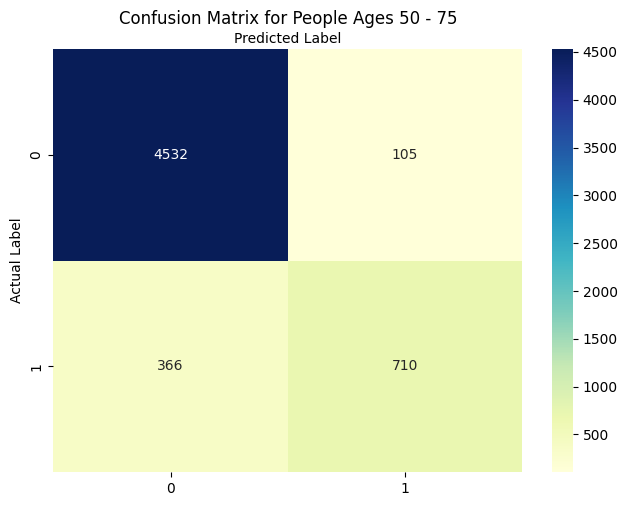

In [ ]:
## Step (6) for ages 50 to 75.
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for People Ages 50 - 75')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

$False Positive Rate = \frac{FP}{FP+TN} = \frac{105}{105+4532}=0.023$

---
$True Positive Rate = \frac{TP}{TP+FN} = \frac{710}{710+366}=0.66$


---




# Confusion Matrix for Individuals Ages 50 to 75 Only

The Confusion Matrix of our model for males only shows several things. First, it tells us that for the 4,637 individuals in the age group who did not have diabetes, the model predicted that 4,637 of them would not have diabetes and 105 of them would have diabetes. Next, it tells us that for the 1076 individuals in the age group who do have diabetes, the model predicted that 366 of them do not have diabetes and 710 of them do. From these sections, we can calculate a False Positive Rate of 0.023, and a True Positive Rate of 0.66. Essentially, this shows that our model is good at predicting for individuals in the age group who do not have diabetes, but not accurate at predicting those in the age group who do have diabetes.

In [ ]:
## Step (4) for ages 75 to 80 (max age)
df_ages_75_to_80 = diabetes_df[(diabetes_df['age'] >= 75) & (diabetes_df['age'] < 80)]
X = df_ages_75_to_80.drop("diabetes", axis=1)
y = df_ages_75_to_80.diabetes
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
## Step (5) for ages 75 to 80.
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-2.36825706]
Coefficients [[ 3.12862236e-03  3.19945163e-01  3.69392829e-01  5.39658129e-01
   2.59913910e+00  1.61024131e+00  3.68109878e-02 -3.68109878e-02
   7.88072337e-02  2.34129098e-02  8.08374128e-02 -1.18300850e-03
  -1.83819726e-01]]


In [ ]:
## Step (5) cont. for ages 75 to 80.
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.88
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       469
           1       0.81      0.68      0.74       156

    accuracy                           0.88       625
   macro avg       0.85      0.81      0.83       625
weighted avg       0.88      0.88      0.88       625



Explanation of Classification Report:

The report of the model for peoples ages 0 to 25 shows that the precision is 0.90, the recall is 0.95, and the F1-score is 0.92. The precision being 0.90 means that people ages 75 to 80 that were predicted to have diabetes divided by all people ages 75 to 80 who actually have diabetes is 0.90. In other words, the proportion of predicted individuals ages 75 to 80 to have diabetes over the actual amount of individuals ages 75 to 80 to have diabetes is 0.90. Conversely, the recall says that all people in the age group who actually have diabetes divided by all the people in the age group who were predicted to have diabetes is 0.95. Again,this tells us that the proportion of actual individuals ages 75 to 80 to have diabetes over the predicted amount of individuals ages 75 to 80 to have diabetes is 0.95. Finally, the F1-score of the model being 0.92 shows that the model itsel is 92% accurate.

Text(0.5, 427.9555555555555, 'Predicted Label')

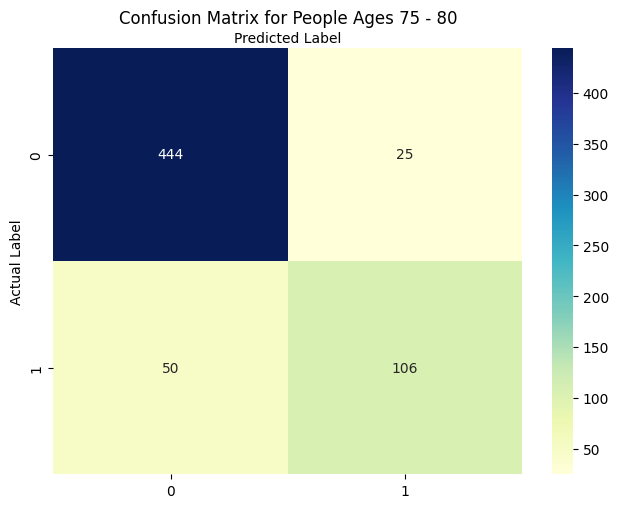

In [ ]:
## Step (6) for ages 75 to 80.
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# Setting up the plot
categories = [0,1]
fig, axis = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)

# Heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
axis.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for People Ages 75 - 80')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


$False Positive Rate = \frac{FP}{FP+TN} = \frac{25}{25+444}=0.05$

---
$True Positive Rate = \frac{TP}{TP+FN} = \frac{106}{106+50}=0.68$

---




# Confusion Matrix for Individuals Ages 75 to 80 Only

The Confusion Matrix of our model for Individual Ages 75 to 80 only shows several things. First, it tells us that for the 469 individuals in the age group who did not have diabetes, the model predicted that 444 of them would not have diabetes and 25 of them would have diabetes. Next, it tells us that for the 156 individuals in the age group who do have diabetes, the model predicted that 50 of them do not have diabetes and 106 of them do. From these sections, we can calculate a False Positive Rate of 0.05, and a True Positive Rate of 0.68. Essentially, this shows that our model is very good at predicting for individuals in the age group who do not have diabetes, but not accurate at predicting those in the age group who do have diabetes.

# **8. Fairness Analysis**

# Gender Specific Models

Male Dataset:


*  Precision: 0.95 for non-diabetics, indicating a high reliability in negative predictions.
*  Recall: 0.98 for non-diabetics, suggesting the model is highly effective in identifying true negatives.
*  F1-Score: High overall accuracy (0.97 for non-diabetics).
*  False Positive Rate: 0.017, indicating very few males without diabetes are incorrectly predicted as diabetic.

Female Dataset:


*  Precision: 0.96 for non-diabetics, slightly higher than males.
*  Recall: 0.99 for non-diabetics, indicating even better performance in identifying true negatives than the male model.
*   F1-Score: Comparable high accuracy (0.98 for non-diabetics).
*   False Positive Rate: 0.01, slightly lower than males, suggesting a better performance in avoiding incorrect diabetic predictions for females.







# Age Specific Models

Ages 0-25:


*   Precision: Extremely high (0.99), but this is largely because the model hardly identifies any false positives.
*   Recall: Perfect (1.00) for non-diabetics.
*   F1-Score: Perfect (1.00) suggesting model is highly accurate within this age group.
*   False Positive Rate: 0.0, indicating no false positives in this age group.

Ages 25-50:


*   Precision and recall are lower compared to the 0-25 age group, but still relatively high.
*   F1-Score: High, but the recall for diabetics is only 0.49, showing a significant drop compared to the younger group.
*   False Positive Rate: Very low (0.003), indicating very few incorrect positive predictions.

Ages 50-75:


*   Performance metrics are lower than in the younger groups but still robust.
*   F1-Score and recall drop for diabetics (0.66).
*   False Positive Rate increases to 0.023.

Ages 75-100:


*   Metrics indicate a decline, especially in recall for diabetics (0.68).
*   False Positive Rate increases to 0.05.









# Fairness Analysis

Models for females generally have a slightly better false positive rate than those for males, potentially indicating a model bias where the algorithm is more conservative with predicting diabetes in females. The performance significantly varies with age, where younger groups (0-25) see much better performance metrics across all scores compared to older groups. This might suggest age-related bias where the model is less effective as the age increases, especially in terms of sensitivity, in this case recall, for true diabetic cases.

# Implications for AI Fairness

These differences necessitate adjustments in model training processes, perhaps through techniques like balanced sampling, customized feature engineering, or different model thresholds for different groups to ensure equitable performance across all demographics. Continuous monitoring of model performance across demographic groups is essential to ensure these biases do not result in unfair treatment of any group, particularly in sensitive applications like healthcare.